## Objective: Use different models to predict if a person is benign or malignant for breast cancer

#### Import modules and split the data

In [2]:
# Import sklearn modules.
from sklearn.model_selection import GridSearchCV, cross_validate, train_test_split
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, recall_score
from sklearn.decomposition import PCA
from scipy.special import expit

# Import other modules.
import pandas as pd
from IPython.display import display
from time import time
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
%matplotlib inline

dataset = pd.read_csv('data.csv')

# Splitting csv file into data and target variables.
data = dataset.loc[:, 'radius_mean':'fractal_dimension_worst']
target = pd.get_dummies(dataset.loc[:, 'diagnosis']).loc[:, 'B']

data = data.to_numpy()
target = target.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42, stratify=target)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

print(np.bincount(y_train))
print(np.bincount(y_test))


(426, 30)
(426,)
(143, 30)
(143,)
[159 267]
[53 90]


#### Visualize the data with TSNE

c:\Users\rohan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\rohan\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


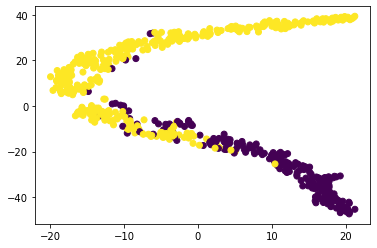

In [3]:
tsne = TSNE(random_state=42)

data_trans = tsne.fit_transform(data)

plt.scatter(data_trans[:, 0], data_trans[:, 1], c=target)


#### Use Perceptron to check if data is linear

In [4]:
lr_clf = Perceptron(n_jobs=-1, random_state=42)
start_time = time()

lr_clf.fit(X_train, y_train)

print('\n\t---------- Training Results ----------- ')
print(f'\tTrain Score -> {lr_clf.score(X_train, y_train)* 100:.2f}%')
print(f'\tTest Score -> {lr_clf.score(X_test, y_test) * 100:.2f}%')
print(f'\tElapsed -> {(time() - start_time)/60:.2f} minutes')


	---------- Training Results ----------- 
	Train Score -> 92.02%
	Test Score -> 92.31%
	Elapsed -> 0.00 minutes


#### Use more advanced linear model

In [5]:
# Create logistic regression model.
logreg = LogisticRegression(
    solver='liblinear',
    C=1000, n_jobs=-1,
    class_weight='balanced',
    random_state=42
    )

# NOTE: liblinear is the best optimization algirhtm for small datasets.

logreg.fit(X_train, y_train)

print('\n\t---------- Training Results ----------- ')
print(f'\tTrain Score -> {logreg.score(X_train, y_train)* 100:.2f}%')
print(f'\tTest Score -> {logreg.score(X_test, y_test) * 100:.2f}%')
print(f'\tElapsed -> {(time() - start_time)/60:.2f} minutes')


	---------- Training Results ----------- 
	Train Score -> 96.48%
	Test Score -> 95.80%
	Elapsed -> 0.06 minutes


c:\Users\rohan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1523: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 12.
  warnings.warn(


#### Add recall score and confusion matrix

In [6]:
pred = logreg.predict(X_test)

# confusion matrix function.
def confusion_matrix(target, predictions):
    matrix = []
    for column_label in np.unique(target):
        column = []
        pred_label = predictions[np.where(target == column_label)]
        
        for label in np.unique(target):
            column.append(sum(pred_label == label))
        
        matrix.append(column)
    
    return np.array(matrix).T

matrix = confusion_matrix(y_test, pred)

print(f'confusion matrix: \n{matrix}')

# create recall function.
def recall(confusion_matrix):
    matrix = confusion_matrix    # Get underlying array.
    true_pos = matrix[0][0]
    false_neg = matrix[1][0]
    return true_pos / (true_pos + false_neg)

print(f'Recall score: {recall(matrix)*100:.2f}%')

confusion matrix: 
[[49  2]
 [ 4 88]]
Recall score: 92.45%


#### Plot the results of the new model

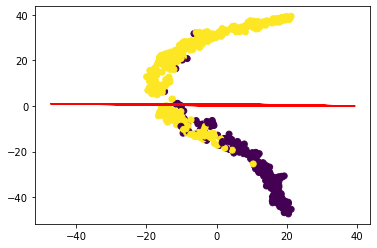

In [7]:
m = sorted(logreg.coef_[0])[:2]
b = logreg.intercept_[0]
loss = expit(data_trans * m + b)

plt.scatter(data_trans[:, 0], data_trans[:, 1], c=target, label=target)
plt.plot(data_trans, loss, color='red')


In [30]:
weights = np.array([round(weight) for weight in logreg.coef_[0]])
variables = dataset.drop(columns=['Unnamed: 32', 'id', 'diagnosis']).columns
indexes = np.where(weights > 0)[0]

variables[np.where(weights > 0)[0]]


Index(['radius_mean', 'texture_se', 'radius_worst'], dtype='object')

In [20]:
print(len())

30


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
